# Inferência Estatística

Verificando no dataset 'Pinguins' do seaborn a inferência estatística entre a massa corporal de machos e fêmeas.

In [1]:
# Importado as bibliotecas necessárias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Carregando o dataset

pg = sns.load_dataset('penguins')

In [3]:
# Verificando dados faltantes

pg.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
# Removendo dados faltantes

pg = pg.dropna()

In [5]:
# Fazendo um Groupby dos sexos

pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

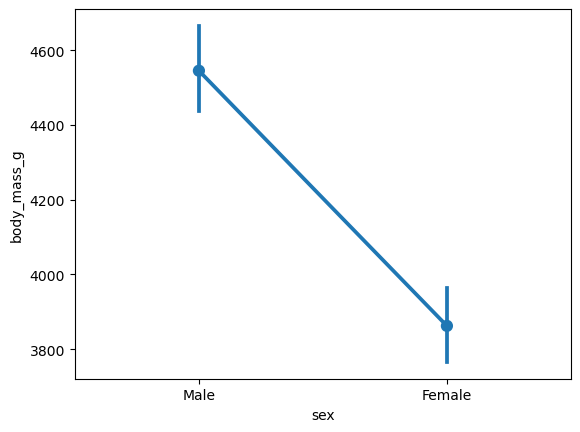

In [6]:
# Visuzlizando a diferença de peso por sexo

sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [7]:
# Criando a separação de Grupo A e B na coluna Grupo

pg['Grupo']= pg['sex'].map({'Male':'Grupo A', 'Female':'Grupo B'})


In [8]:
# Calculando o desvio padrão da variável 'body_mass_g' para cada grupo 'sex' e, em seguida, calculando a média desses desvios padrão.
desvpad = pg.groupby('Grupo')['body_mass_g'].var().mean()**.5

# Calculando as médias da variável 'body_mass_g' para os grupos 'Grupo A' e 'Grupo B'.
Média_A = pg.groupby('Grupo')['body_mass_g'].mean()['Grupo A']
Média_B = pg.groupby('Grupo')['body_mass_g'].mean()['Grupo B']

# Calculando a diferença entre as médias de 'Grupo A' e 'Grupo B'.
diferença = Média_A - Média_B  # Numerador da fórmula

# Calculando o erro padrão da diferença das médias usando a fórmula com uma correção para o tamanho da amostra.
erro_padrao = desvpad * ((2/10)**.5)  # variância amostral*raiz(2/n)

# Calculando a estatística do teste t.
t = diferença / erro_padrao  # Estatística do teste

# Calculando a região crítica usando a função st.t.ppf(), que corresponde ao valor crítico para um nível de significância de 0.05 (5%).
RC = st.t.ppf(0.95, 18)  # Região crítica: sob h0, t está na RC 5% das vezes

# Calculando o valor-p usando a função st.t.cdf().
p_value = 1 - st.t.cdf(t, 18)  # p-value: a menor significância para a qual rejeitamos o teste

# Imprimindo os resultados, incluindo a diferença das médias, o desvio padrão, o erro padrão, a estatística do teste t, a região crítica e o valor-p.
print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')


diferença: 683.41
desvio padrão: 729.43
erro padrão: 326.21
estatística do teste: 2.09
região crítica: 1.73 ou mais
p-value: 0.02529 ou mais


## 2) Representação gráfica do teste

Visualizando a estatística do teste, sua distribuição e a região crítica do teste.

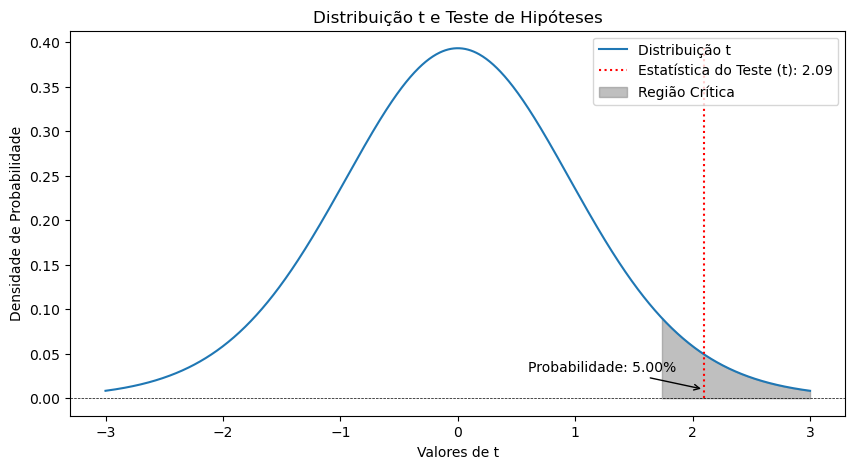

A probabilidade de que os valores estejam entre 1,73 e inf é de 5,00%


In [9]:
# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance ** 0.5

# Valores de X para plotar a densidade
x = np.linspace(-3, 3, 1000) 
y = st.t.pdf(x, 18)

# low = início da região crítica do teste
low = st.t.ppf(0.95, 18)
high = np.inf

# Criação do gráfico de densidade da distribuição t
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, label='Distribuição t')

# Linha de referência para a estatística do teste (t)
ax.vlines(x=[t], ymin=0, ymax=max(y), colors='r', linestyles='dotted', label=f'Estatística do Teste (t): {t:.2f}')

# Área sombreada para a região crítica
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=0.5, color='gray', label='Região Crítica')

# Probabilidade de t pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)
ax.annotate(f'Probabilidade: {prob_area:.2%}', xy=(t, 0.01), xytext=(t - 1.5, 0.03),
            arrowprops=dict(arrowstyle='->', color='black'))

# Configurações do gráfico
ax.set_xlabel('Valores de t')
ax.set_ylabel('Densidade de Probabilidade')
ax.set_title('Distribuição t e Teste de Hipóteses')
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.legend()

# Exibir o gráfico
plt.show()

print(f'A probabilidade de que os valores estejam entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.', ','))

## 3) Considerando as espécies

Uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [10]:
desvpad = pg.loc[pg['species'] == 'Adelie'].groupby('sex')['body_mass_g'].var().mean()**.5
Média_A = pg.loc[pg['species'] == 'Adelie'].groupby('sex')['body_mass_g'].mean()['Male']
Média_B = pg.loc[pg['species'] == 'Adelie'].groupby('sex')['body_mass_g'].mean()['Female']

diferença = Média_A - Média_B      # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao          # Estatística do teste
RC = st.t.ppf(.95, 18)             # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)          # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

p_value_adelie = p_value

diferença: 674.66
desvio padrão: 310.52
erro padrão: 138.87
estatística do teste: 4.86
região crítica: 1.73 ou mais
p-value: 0.00006 ou mais


In [11]:
desvpad = pg.loc[pg['species'] == 'Chinstrap'].groupby('sex')['body_mass_g'].var().mean()**.5
Média_A = pg.loc[pg['species'] == 'Chinstrap'].groupby('sex')['body_mass_g'].mean()['Male']
Média_B = pg.loc[pg['species'] == 'Chinstrap'].groupby('sex')['body_mass_g'].mean()['Female']

diferença = Média_A - Média_B      # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao          # Estatística do teste
RC = st.t.ppf(.95, 18)             # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)          # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

p_value_chinstrap = p_value

diferença: 411.76
desvio padrão: 326.01
erro padrão: 145.79
estatística do teste: 2.82
região crítica: 1.73 ou mais
p-value: 0.00562 ou mais


In [12]:
desvpad = pg.loc[pg['species'] == 'Gentoo'].groupby('sex')['body_mass_g'].var().mean()**.5
Média_A = pg.loc[pg['species'] == 'Gentoo'].groupby('sex')['body_mass_g'].mean()['Male']
Média_B = pg.loc[pg['species'] == 'Gentoo'].groupby('sex')['body_mass_g'].mean()['Female']

diferença = Média_A - Média_B      # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao          # Estatística do teste
RC = st.t.ppf(.95, 18)             # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)          # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

p_value_gentoo = p_value

diferença: 805.09
desvio padrão: 297.79
erro padrão: 133.17
estatística do teste: 6.05
região crítica: 1.73 ou mais
p-value: 0.00001 ou mais


## P-Values de cada raça

In [13]:
print(f'p-value associado a raça Adelie: {p_value_adelie:.5f}')
print(f'p-value associado a raça Gentoo: {p_value_gentoo:.5f}')
print(f'p-value associado a raça Chinstrap: {p_value_chinstrap:.5f}')

p-value associado a raça Adelie: 0.00006
p-value associado a raça Gentoo: 0.00001
p-value associado a raça Chinstrap: 0.00562
